In [1]:
import numpy as np
import pandas as pd

# first import the library
import networkx as nx

In [2]:
karate = nx.karate_club_graph()

#Name: Zachary's Karate Club
#Type: Graph
#Number of nodes: 34
#Number of edges: 78
#Average degree:   4.5882

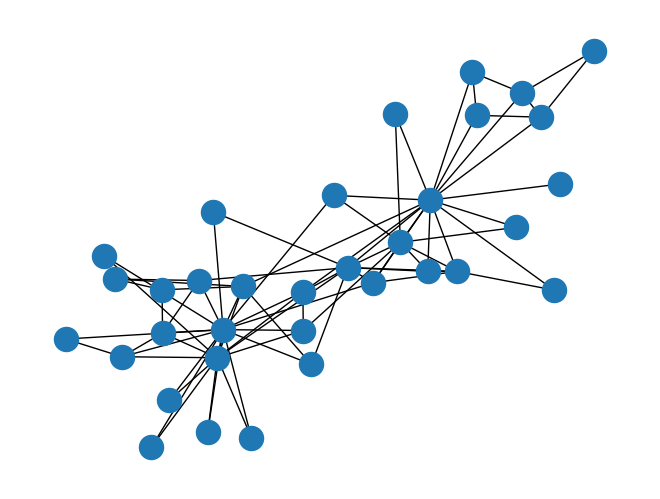

In [3]:
import matplotlib.pyplot as plt # import the dependent library
nx.draw(karate)

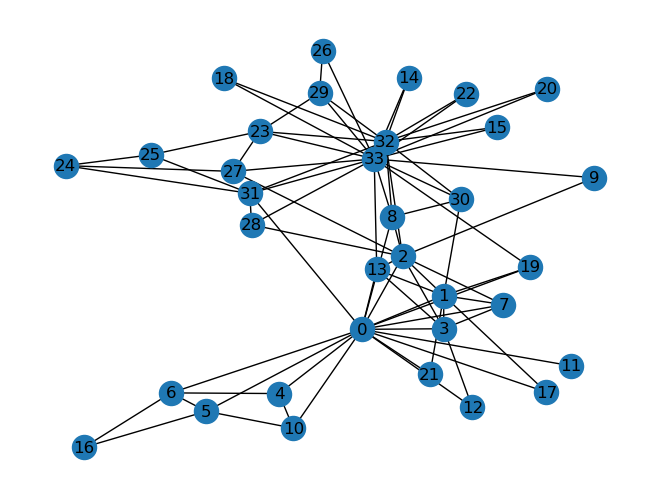

In [4]:
nx.draw(karate, with_labels=True)

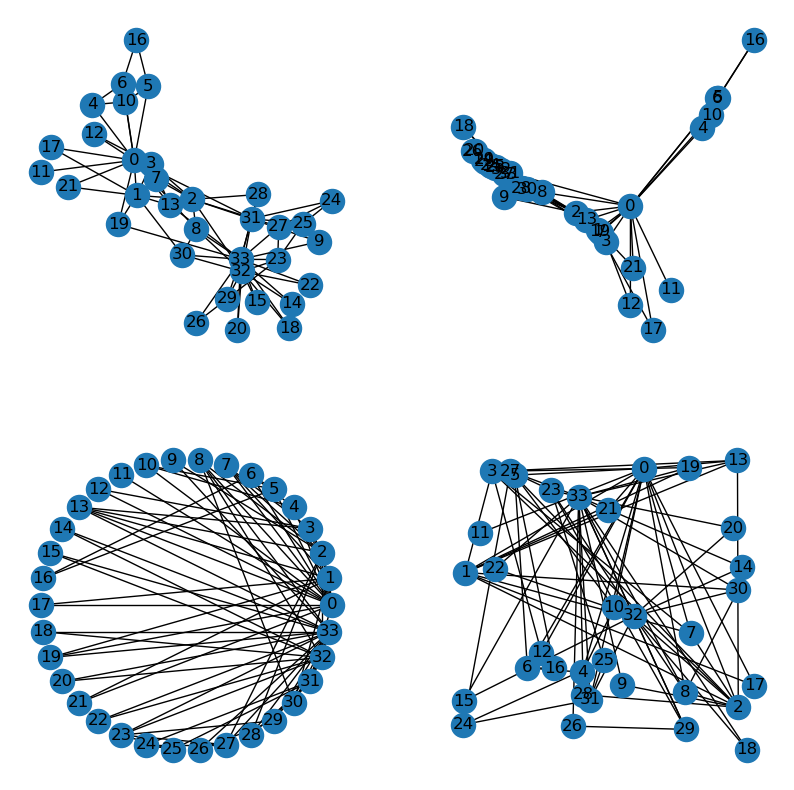

In [7]:
plt.figure(figsize=(10,10))
# plt.subplot() will create "sub-plots" in one canvas
# Now we are telling matplotlib to give us a 2x2 subplot canvas
plt.subplot(221)  # first subplot
nx.draw_spring(karate, with_labels=True) #Draw the graph G with a spring layout.
plt.subplot(222) # second subplot
nx.draw_spectral(karate, with_labels=True) #Draw the graph G with a spectral 2D layout.
plt.subplot(223) # third subplot
nx.draw_circular(karate, with_labels=True)
plt.subplot(224) # last subplot
nx.draw_random(karate, with_labels=True)

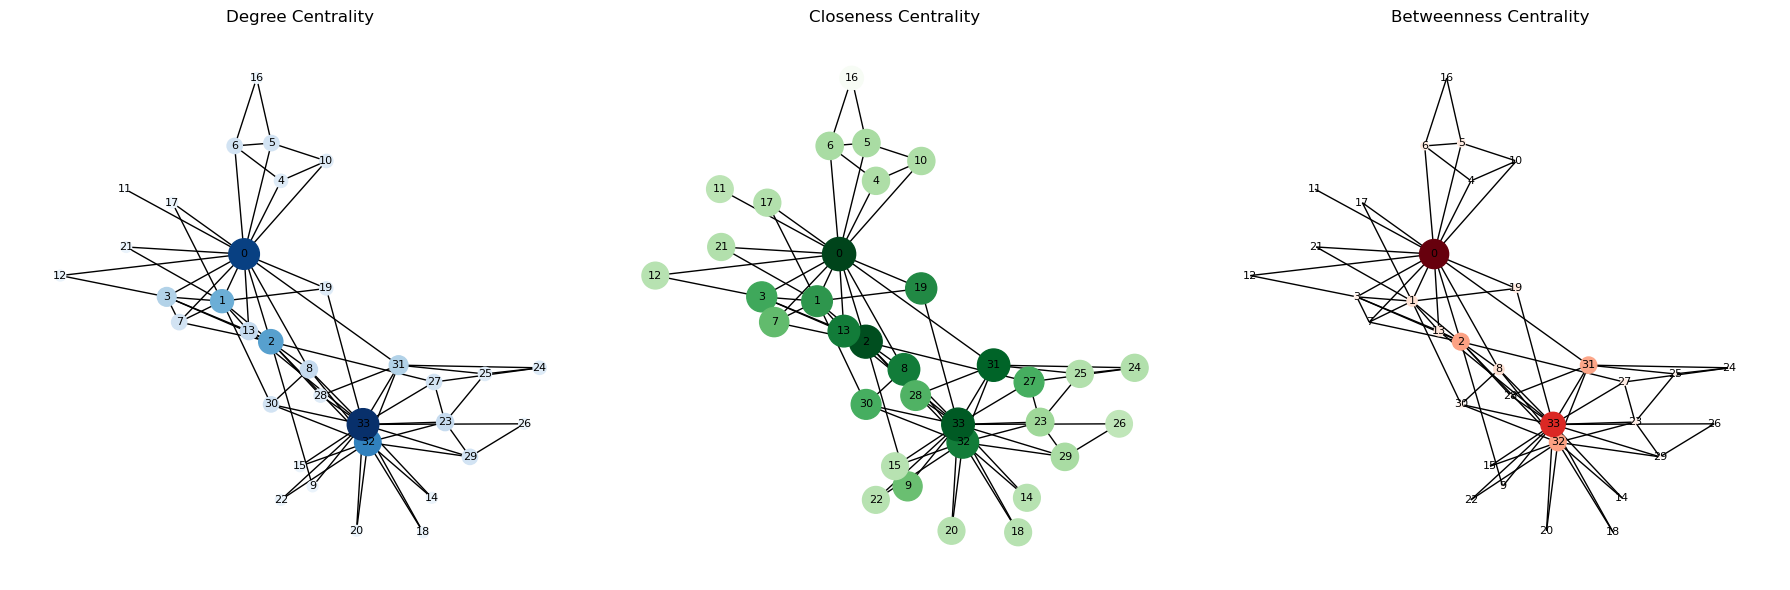

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Calculate centrality measures
degree_centrality = nx.degree_centrality(karate) 
#Compute the degree centrality for nodes.
#The degree centrality for a node v is the fraction of nodes it is connected to.

closeness_centrality = nx.closeness_centrality(karate)
# Closeness centrality of a node u is the reciprocal of the average shortest path distance to u over all n-1 reachable nodes.

betweenness_centrality = nx.betweenness_centrality(karate)
# Betweenness centrality of a node is the sum of the fraction of all-pairs shortest paths that pass through 


# Set up layout and figure
pos = nx.spring_layout(karate, seed=42)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Degree Centrality
nx.draw(
    karate, pos, ax=axes[0],
    node_size=[v * 1000 for v in degree_centrality.values()],
    node_color=list(degree_centrality.values()),
    cmap=cm.Blues, with_labels=True, font_size=8
)
axes[0].set_title("Degree Centrality")

# Closeness Centrality
nx.draw(
    karate, pos, ax=axes[1],
    node_size=[v * 1000 for v in closeness_centrality.values()],
    node_color=list(closeness_centrality.values()),
    cmap=cm.Greens, with_labels=True, font_size=8
)
axes[1].set_title("Closeness Centrality")

# Betweenness Centrality
nx.draw(
    karate, pos, ax=axes[2],
    node_size=[v * 1000 for v in betweenness_centrality.values()],
    node_color=list(betweenness_centrality.values()),
    cmap=cm.Reds, with_labels=True, font_size=8
)
axes[2].set_title("Betweenness Centrality")

# Show plots
plt.tight_layout()
plt.show()


In [10]:
# Community detection
# Naturally, we want to know if there are groups/clusters of nodes in a network. 
# Well seperated networks may indicate some emergent patterns within the nodes.

comm = list(nx.community.girvan_newman(karate))
layout = nx.fruchterman_reingold_layout(karate) # positions for all nodes

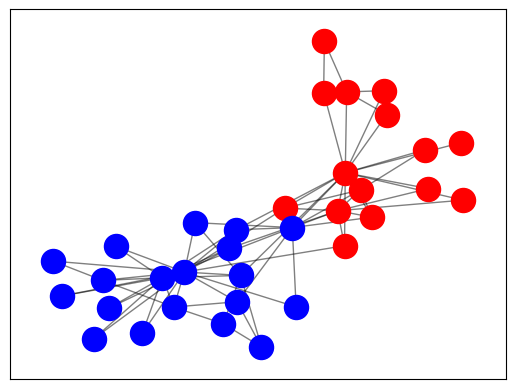

In [11]:
# 1st community
nx.draw_networkx_nodes(karate, layout, nodelist=comm[0][0],
                       node_color='r')
# 2nd community
nx.draw_networkx_nodes(karate, layout, nodelist=comm[0][1],
                       node_color='b')
# draw edges
nx.draw_networkx_edges(karate, layout, width=1.0, alpha=0.5)

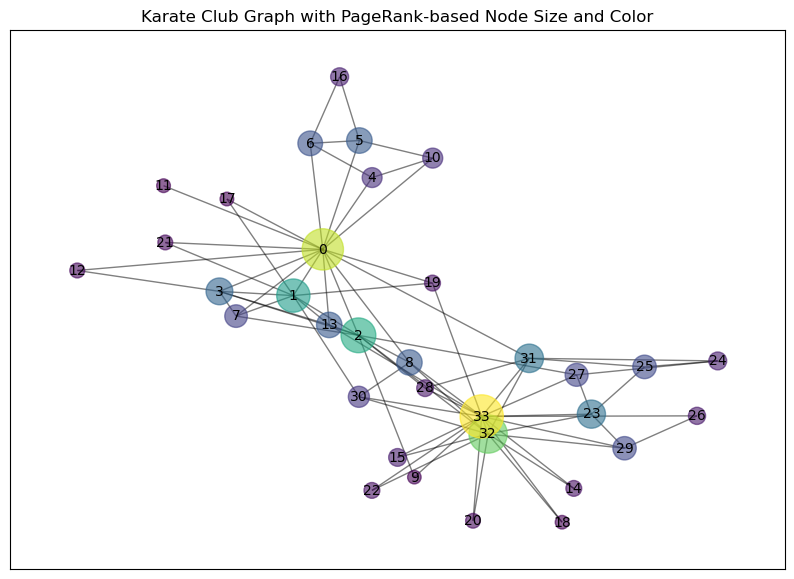

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Calculate PageRank
# PageRank can measure node importance, identifying which nodes (members) are the most central based on connectivity.
pagerank = nx.pagerank(karate)

# Normalize PageRank values for color mapping
norm = mcolors.Normalize(vmin=min(pagerank.values()), vmax=max(pagerank.values()))
#cmap = cm.viridis
node_colors = [cmap(norm(pagerank[node])) for node in karate.nodes]

# Draw graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(karate, seed=42)

# Draw nodes with sizes based on PageRank and colors mapped to values
nx.draw_networkx_nodes(
    karate, pos,
    node_size=[v * 10000 for v in pagerank.values()],
    node_color=node_colors,
     alpha=0.6
)

nx.draw_networkx_edges(karate, pos, alpha=0.5)
nx.draw_networkx_labels(karate, pos, font_size=10)


plt.title("Karate Club Graph with PageRank-based Node Size and Color")
plt.show()


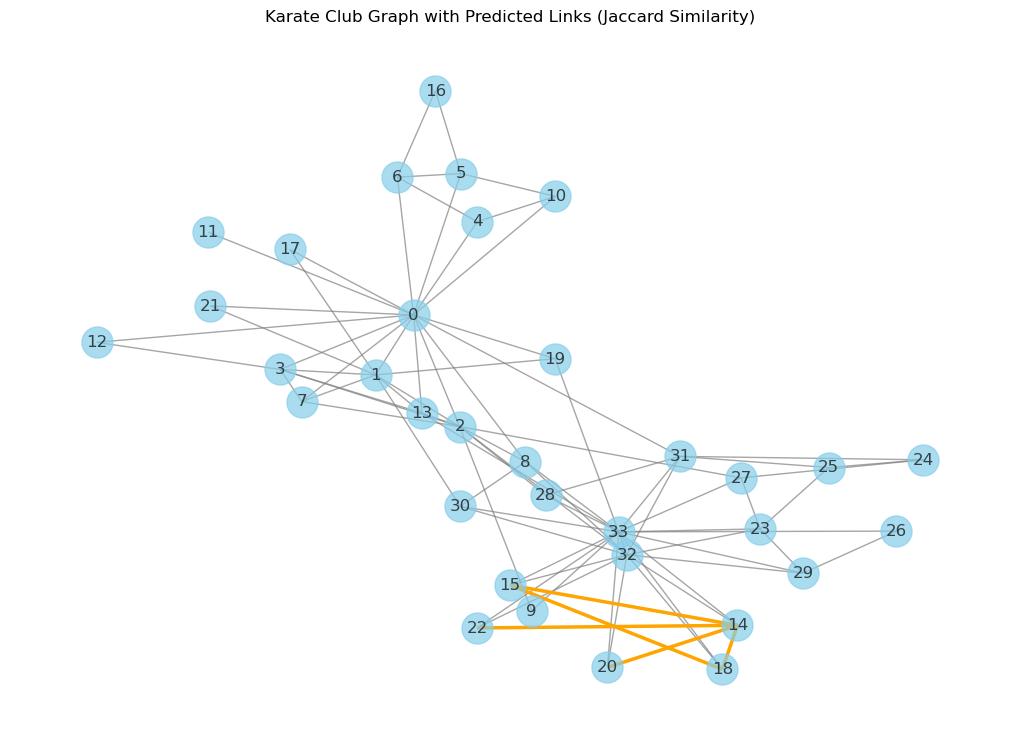

In [18]:
#Use Jaccard similarity to predict potential new links. 
#Similar nodes (based on shared neighbors) may form future connections.

from networkx.algorithms.link_prediction import jaccard_coefficient

# Calculate Jaccard coefficient for all non-linked pairs
preds = list(jaccard_coefficient(karate))

# Draw original graph
plt.figure(figsize=(10, 7))
nx.draw(karate, pos, with_labels=True, node_color="skyblue", node_size=500, edge_color="gray", alpha=0.7)

# Highlight predicted links with high Jaccard scores
for u, v, p in sorted(preds, key=lambda x: -x[2])[:5]:  # Top 5 likely new edges
    nx.draw_networkx_edges(karate, pos, edgelist=[(u, v)], width=2.5, edge_color="orange")

plt.title("Karate Club Graph with Predicted Links (Jaccard Similarity)")
plt.show()


In [32]:
# Information Spread: information flow through a network
import networkx as nx
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation

# Set up the graph
G = karate
pos = nx.spring_layout(G, seed=42)  # Fix layout for consistency

# Parameters
infection_probability = 0.9  # Probability of infecting a neighbor
initial_infected = [10]       # Start infection from node 0
infected = set(initial_infected)
newly_infected = set(initial_infected)


# Animation function
def update(num):
    #ax.clear()
    #plt.title(f"Step {num} - Information Spread")
    
    # Draw nodes
    node_colors = []
    for node in G.nodes:
        if node in infected:
            node_colors.append('red')  # Already infected
        else:
            node_colors.append('lightblue')  # Not infected

    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_colors, node_size=300)
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

    # Spread infection to neighbors
    global newly_infected
    next_newly_infected = set()
    for node in newly_infected:
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if neighbor not in infected and random.random() < infection_probability:
                next_newly_infected.add(neighbor)
                infected.add(neighbor)

    newly_infected = next_newly_infected

# Store animation in a persistent variable to prevent deletion
anim = FuncAnimation(fig, update, frames=20, repeat=False)
plt.show()

from IPython.display import HTML
HTML(anim.to_jshtml())
